# DATA SCIENCE INTERN @BHARAT INTERN

# NAME:MEDURI NIKHESH

# TASK 1 : STOCK PREDICTION

# PURPOSE : TO PREDICT THE STOCK PRICE OF A COMPANY USING LSTM.

# ABOUT DATASET

# Amazon Stock Prediction

This dataset contains historical data of Google's stock prices and related attributes. It consists of 14 columns and a smaller subset of 1257 rows. Each column represents a specific attribute, and each row contains the corresponding values for that attribute.

The columns in the dataset are as follows:

Symbol: The name of the company, which is Amzn in this case.
Date: The year and date of the stock data.
Close: The closing price of Amazon's stock on a particular day.
High: The highest value reached by Amazon's stock on the given day.
Low: The lowest value reached by Amazon's stock on the given day.
Open: The opening value of Amazon's stock on the given day.
Volume: The trading volume of Amazon's stock on the given day, i.e., the number of shares traded.

# STEPS INVOLVED :

# 1 . IMPORTING LIBRARIES AND DATA TO BE USED

# 2. GATHERING INSIGHTS

# 3. DATA PRE-PROCESSING

# 4. CREATING LSTM MODEL

# 5. VISUALIZING ACTUAL VS PREDICTED DATA

# 6. PREDICTING UPCOMING 15 DAYS

In [ ]:
!pip install numpy

In [ ]:
import numpy as np

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib.pyplot

In [ ]:
import matplotlib as plot

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

In [ ]:
warnings.filterwarnings('ignore') # ignore warnings 

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
pip install numpy pandas matplotlib seaborn scikit-learn keras

In [2]:
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings 

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [3]:
df = pd.read_csv('amazon.csv') 
df.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
95,1997-09-30,4.000000,4.348958,3.802083,4.338542,4.338542,5254800
96,1997-10-01,4.437500,4.500000,3.937500,4.020833,4.020833,4999200
97,1997-10-02,4.041667,4.177083,3.989583,4.010417,4.010417,1876800
98,1997-10-03,4.083333,4.125000,3.979167,4.015625,4.015625,1164000


In [5]:
print("Shape of data:",df.shape)

Shape of data: (6155, 7)


In [6]:
# statistical description of data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6155.000000,6155.000000,6155.000000,6155.000000,6155.000000,6.155000e+03
mean,520.556302,526.216132,514.277282,520.429832,520.429832,7.329010e+06
std,857.161696,865.821041,847.270905,856.668492,856.668492,7.149521e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,38.750000,39.514999,38.104999,38.821251,38.821251,3.579350e+06
50%,92.669998,94.190002,90.750000,92.639999,92.639999,5.470000e+06
75%,528.949982,535.304993,521.950012,529.450012,529.450012,8.294950e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.043292e+08


In [7]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6155 non-null   object 
 1   Open       6155 non-null   float64
 2   High       6155 non-null   float64
 3   Low        6155 non-null   float64
 4   Close      6155 non-null   float64
 5   Adj Close  6155 non-null   float64
 6   Volume     6155 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 336.7+ KB


In [8]:
# checking null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [10]:
df = df[['Date','Open','Close']]

In [11]:
df['Date'] = pd.to_datetime(df['Date']).apply(lambda x: x.date())

In [12]:
df.set_index('Date', drop=True, inplace=True)


In [14]:
df.head(10)

,Open,Close
Date,,
1997-05-15,2.437500,1.958333
1997-05-16,1.968750,1.729167
1997-05-19,1.760417,1.708333
1997-05-20,1.729167,1.635417
1997-05-21,1.635417,1.427083
1997-05-22,1.437500,1.395833
1997-05-23,1.406250,1.500000
1997-05-27,1.510417,1.583333
1997-05-28,1.625000,1.531250


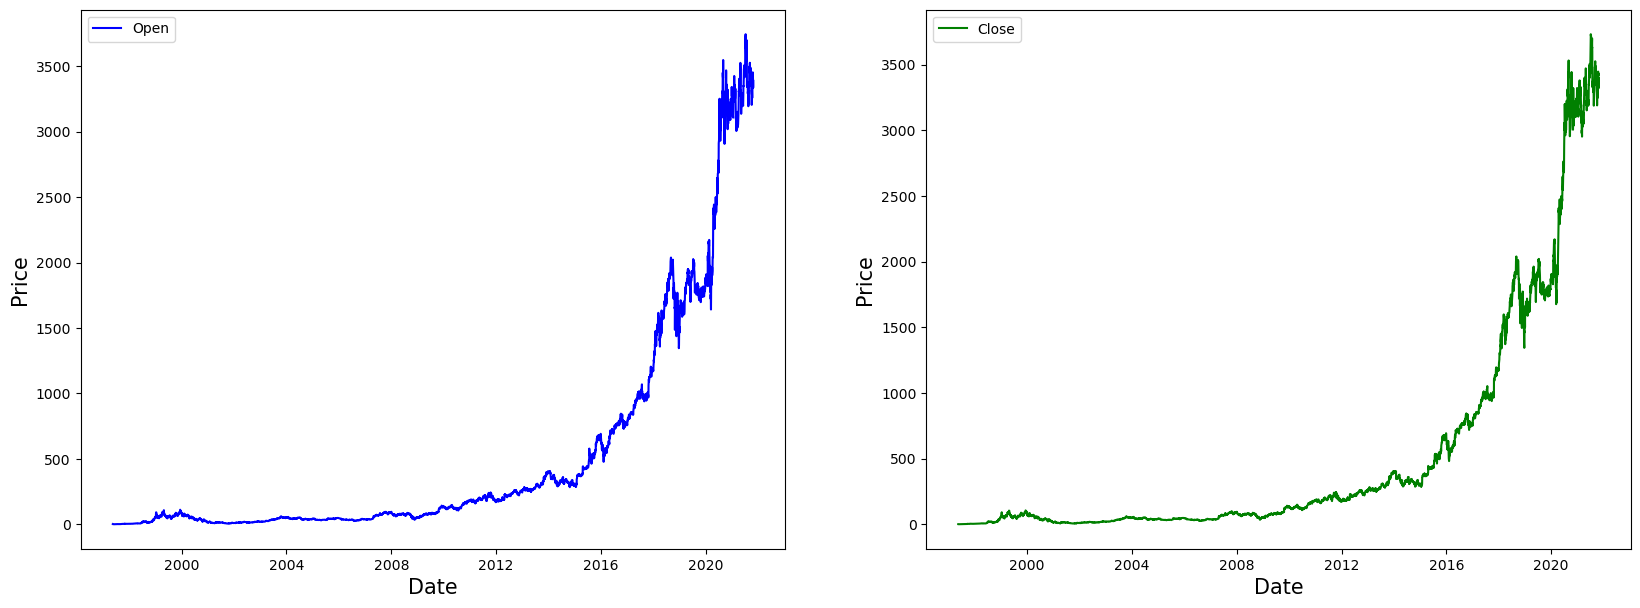

In [15]:
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='green')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [16]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
1997-05-15,0.000276,0.000151
1997-05-16,0.000150,0.000089
1997-05-19,0.000095,0.000084
1997-05-20,0.000086,0.000064
1997-05-21,0.000061,0.000008
1997-05-22,0.000008,0.000000
1997-05-23,0.000000,0.000028
1997-05-27,0.000028,0.000050
1997-05-28,0.000058,0.000036


In [17]:
# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

4616

In [18]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((4616, 2), (1539, 2))

In [19]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [20]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((4566, 50, 2), (4566, 2), (1489, 50, 2), (1489, 2))

In [21]:
# imported Sequential from keras.models 
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
143/143 [==============================] - 6s 25ms/step - loss: 8.5504e-05 - mean_absolute_error: 0.0043 - val_loss: 0.0038 - val_mean_absolute_error: 0.0380
Epoch 2/100
143/143 [==============================] - 3s 22ms/step - loss: 6.7740e-06 - mean_absolute_error: 0.0017 - val_loss: 0.0033 - val_mean_absolute_error: 0.0363
Epoch 3/100
143/143 [==============================] - 3s 21ms/step - loss: 6.2827e-06 - mean_absolute_error: 0.0017 - val_loss: 0.0018 - val_mean_absolute_error: 0.0266
Epoch 4/100
143/143 [==============================] - 3s 22ms/step - loss: 6.3006e-06 - mean_absolute_error: 0.0017 - val_loss: 0.0021 - val_mean_absolute_error: 0.0288
Epoch 5/100
143/143 [==============================] - 3s 22ms/step - loss: 5.3962e-06 - mean_absolute_error: 0.0015 - val_loss: 0.0023 - val_mean_absolute_error: 0.0313
Epoch 6/100
143/143 [==============================] - 3s 21ms/step - loss: 5.8014e-06 - mean_absolute_error: 0.0017 - val_loss: 7.3457e-04 - val_mean

In [25]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]


47/47 [==============================] - 0s 7ms/step


array([[0.17874756, 0.17995831],
       [0.1771252 , 0.17831708],
       [0.17897482, 0.18023984],
       [0.17940554, 0.18065459],
       [0.17783105, 0.17904925]], dtype=float32)

In [26]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[670.3858 , 672.6429 ],
       [664.31396, 666.52106],
       [671.2363 , 673.693  ],
       [672.8483 , 675.24   ],
       [666.9557 , 669.2521 ]], dtype=float32)

In [27]:
# Select the last 264 rows of test_inverse_predicted
test_inverse_predicted_subset = test_inverse_predicted[-264:]

# Create a DataFrame with the selected data and columns
df_predicted = pd.DataFrame(test_inverse_predicted_subset, columns=['open_predicted', 'close_predicted'], index=df.iloc[-264:].index)

# Concatenate the DataFrames
df_merge = pd.concat([df.iloc[-264:].copy(), df_predicted], axis=1)

In [28]:
# Inversing normalization/scaling 
df_merge[['Open','Close']] = MMS.inverse_transform(df_merge[['Open','Close']])
df_merge.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2020-10-12,3349.939941,3442.929932,2695.503662,2680.022705
2020-10-13,3467.989990,3443.629883,2817.879150,2802.981445
2020-10-14,3447.000000,3363.709961,2838.513916,2817.496094
2020-10-15,3292.010010,3338.649902,2771.977295,2745.739746
2020-10-16,3363.229980,3272.709961,2704.933105,2679.096191


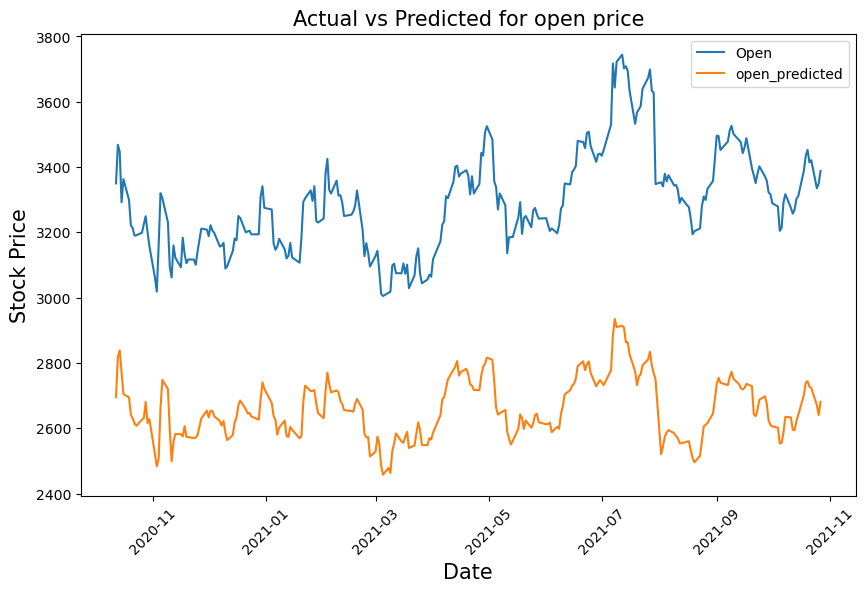

In [29]:
# plotting the actual open and predicted open prices on date index
df_merge[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

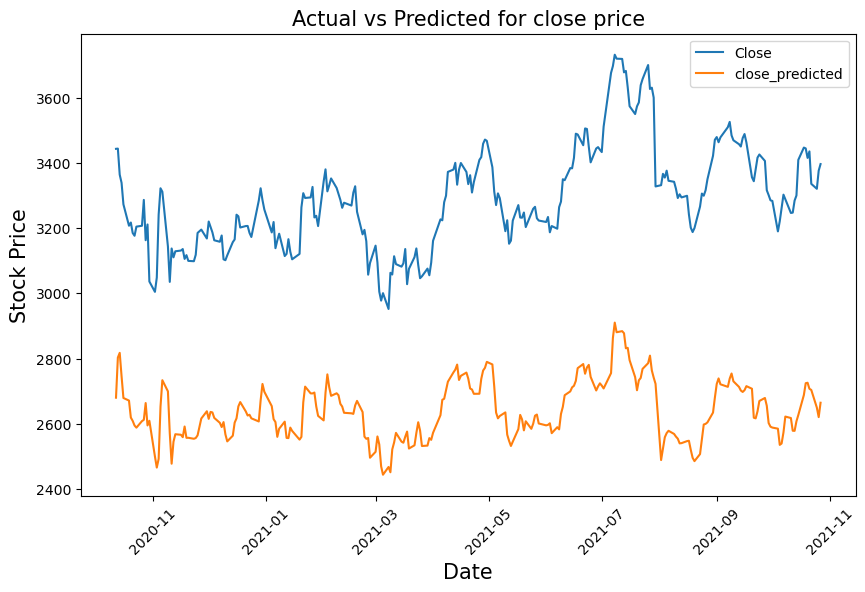

In [30]:
# plotting the actual close and predicted close prices on date index 
df_merge[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [31]:
df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))



In [32]:
from datetime import date

# Convert the string dates to datetime.date objects
start_date = date(2021, 6, 9)
end_date = date(2021, 6, 16)

# Slice the DataFrame using the datetime.date objects
df_merge[start_date:end_date]


,Open,Close,open_predicted,close_predicted
2021-06-09,3272.870117,3281.149902,2644.202148,2630.255859
2021-06-10,3282.010010,3349.649902,2667.370361,2652.069336
2021-06-11,3349.649902,3346.830078,2703.461914,2687.642822
2021-06-14,3346.830078,3383.870117,2716.946289,2699.226318
2021-06-15,3384.000000,3383.129883,2730.342041,2711.687256
2021-06-16,3392.000000,3415.250000,2736.231689,2716.506592


In [33]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [34]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 6ms/step


In [35]:
# inversing Normalization/scaling
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

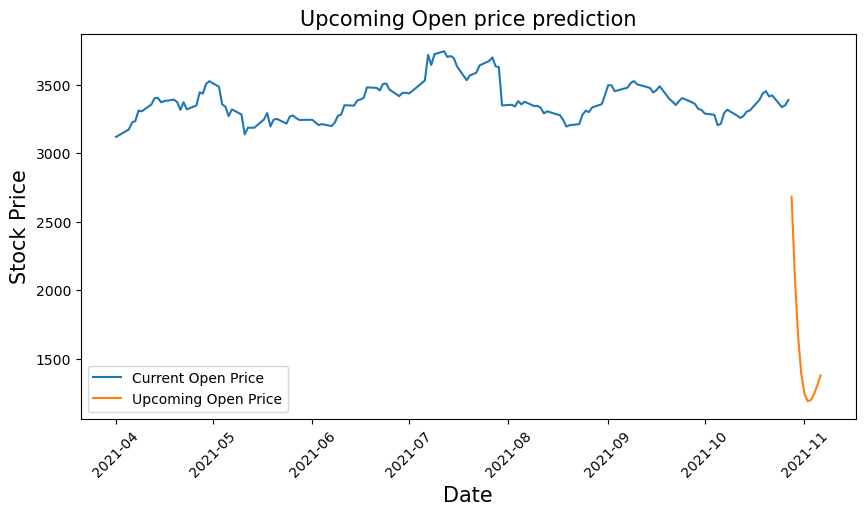

In [36]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
open_date = date(2021, 4, 1)
ax.plot(df_merge.loc[open_date:,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc[open_date:,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

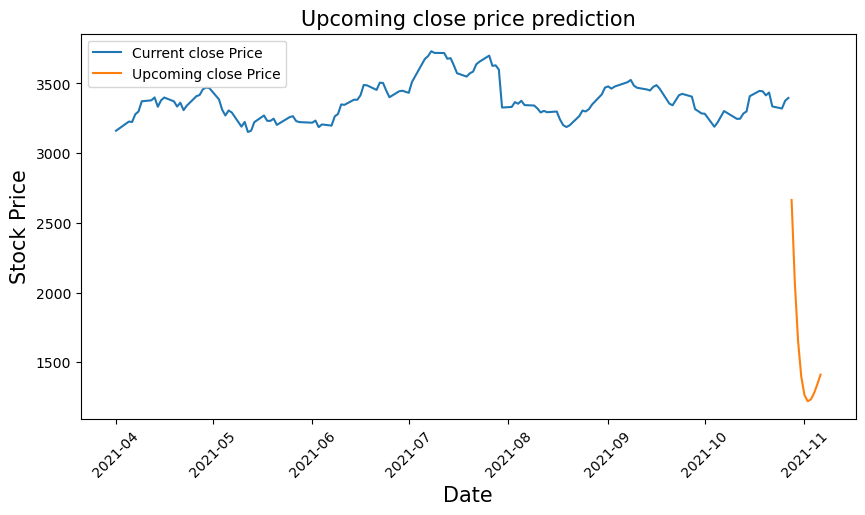

In [37]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
close_date = date(2021,4,1)
ax.plot(df_merge.loc[close_date:,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc[close_date:,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()